In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_ollama import ChatOllama
from typing import TypedDict
llm=ChatOllama(model="llama3.2:1b")

In [2]:
class LLMState(TypedDict):
    question : str
    answer : str 

    

In [3]:
def qa(state:LLMState)->LLMState:
    
    que=state['question']
    prompt=f"Answer the following question{que}"
    ans=llm.invoke(prompt).content
    state["answer"]=ans
    return state

In [4]:
graph=StateGraph(LLMState)
graph.add_node("QA",qa)

graph.add_edge(START,"QA")
graph.add_edge("QA",END)


In [5]:
workflow=graph.compile()

In [6]:
workflow.invoke({"question": "Hi"})

{'question': 'Hi', 'answer': 'How can I help you today?'}

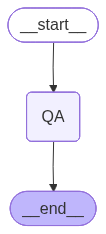

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())